## <font color='red' >Useful libraries and packages (contd.)</font>
***
<body>
<p><font face="Consolas">It's Python, there's rarely the need to re-invent the wheel!</font></p>
</body>

### pandas (Data Frames Made Easy)   https://pandas.pydata.org/

#### pandas is an open source, easy-to-use data structures and data analysis tools for the Python programming language. Some highlights include:
- A fast and efficient DataFrame object for data manipulation with integrated indexing;
- Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
- Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
- Flexible reshaping and pivoting of data sets;
- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets

#### Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

To use pandas, we first need to import the `pandas` package:

In [1]:
import pandas as pd

We will also use `numpy` in some of the examples:

In [2]:
import numpy as np

A "list" in a pandas environment is known as a series: 

In [3]:
s = pd.Series([1,4,6,7,np.nan,888])
s

0      1.0
1      4.0
2      6.0
3      7.0
4      NaN
5    888.0
dtype: float64

### The first column is known as the 'index' in a pandas setting

A dataframe is a more formal structure in pandas. It contains column headers and is the most common type of pandas object to work with. Here, we will create a `pandas` DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [4]:
dates = pd.date_range('20190219', periods=6)

In [5]:
dates

DatetimeIndex(['2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-23', '2019-02-24'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.rand(6,4), index=dates, columns = ['prob_RA','prob_SN','prob_ZR','prob_IP'])

In [7]:
df

prob_RA   prob_SN   prob_ZR   prob_IP
2019-02-19  0.709765  0.724261  0.359588  0.628746
2019-02-20  0.821770  0.462299  0.035144  0.217011
2019-02-21  0.137175  0.228289  0.609257  0.103670
2019-02-22  0.154152  0.679880  0.511004  0.026423
2019-02-23  0.109846  0.580039  0.473555  0.895774
2019-02-24  0.935749  0.030422  0.705712  0.830062

You can now access individual columns:

In [8]:
df.prob_RA

2019-02-19    0.709765
2019-02-20    0.821770
2019-02-21    0.137175
2019-02-22    0.154152
2019-02-23    0.109846
2019-02-24    0.935749
Freq: D, Name: prob_RA, dtype: float64

..and make a nice plot! 

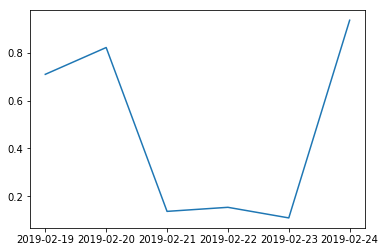

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.tight_layout()
plt.plot(df.prob_RA)

To access the specific values, use `.values`

In [12]:
df.prob_RA.values

array([0.70976487, 0.82176999, 0.1371746 , 0.15415217, 0.10984599,
       0.9357492 ])

To see the column data types, use `.dtypes`

In [17]:
df.head(1)

prob_RA   prob_SN   prob_ZR   prob_IP
2019-02-19  0.709765  0.724261  0.359588  0.628746

### You can create a DataFrame by using a dictonary:

In [18]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20190102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["snow", "rain", "freezing_rain", "sleet"]),
                    'F': 'weather'})

In [20]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### use `df.head()` and `df.tail()` for DataFrame previews:

Display the index, columns:

In [21]:
df.index

DatetimeIndex(['2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-23', '2019-02-24'],
              dtype='datetime64[ns]', freq='D')

In [22]:
df.columns

Index(['prob_RA', 'prob_SN', 'prob_ZR', 'prob_IP'], dtype='object')

`describe()` shows a quick statistic summary of your data:

In [23]:
df.describe()

prob_RA   prob_SN   prob_ZR   prob_IP
count  6.000000  6.000000  6.000000  6.000000
mean   0.478076  0.450865  0.449043  0.450281
std    0.384188  0.272148  0.234650  0.381774
min    0.109846  0.030422  0.035144  0.026423
25%    0.141419  0.286791  0.388080  0.132006
50%    0.431959  0.521169  0.492280  0.422879
75%    0.793769  0.654920  0.584694  0.779733
max    0.935749  0.724261  0.705712  0.895774

Transposing your data:

In [24]:
df.T

2019-02-19  2019-02-20  2019-02-21  2019-02-22  2019-02-23  \
prob_RA    0.709765    0.821770    0.137175    0.154152    0.109846   
prob_SN    0.724261    0.462299    0.228289    0.679880    0.580039   
prob_ZR    0.359588    0.035144    0.609257    0.511004    0.473555   
prob_IP    0.628746    0.217011    0.103670    0.026423    0.895774   

         2019-02-24  
prob_RA    0.935749  
prob_SN    0.030422  
prob_ZR    0.705712  
prob_IP    0.830062

Sorting is easy:

In [26]:
df.sort_values(by='prob_RA', ascending=True)

prob_RA   prob_SN   prob_ZR   prob_IP
2019-02-23  0.109846  0.580039  0.473555  0.895774
2019-02-21  0.137175  0.228289  0.609257  0.103670
2019-02-22  0.154152  0.679880  0.511004  0.026423
2019-02-19  0.709765  0.724261  0.359588  0.628746
2019-02-20  0.821770  0.462299  0.035144  0.217011
2019-02-24  0.935749  0.030422  0.705712  0.830062

## Selection

See the indexing documentation Indexing and Selecting Data and MultiIndex / Advanced Indexing.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing
- https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced

Selecting a single column, which yields a Series, equivalent to df.prob_RA:

In [28]:
df['prob_RA']

array([0.70976487, 0.82176999, 0.1371746 , 0.15415217, 0.10984599,
       0.9357492 ])

Selecting via [], which slices the rows.

In [29]:
df[0:3]

prob_RA   prob_SN   prob_ZR   prob_IP
2019-02-19  0.709765  0.724261  0.359588  0.628746
2019-02-20  0.821770  0.462299  0.035144  0.217011
2019-02-21  0.137175  0.228289  0.609257  0.103670

In [30]:
df.loc[dates[0]]

prob_RA    0.709765
prob_SN    0.724261
prob_ZR    0.359588
prob_IP    0.628746
Name: 2019-02-19 00:00:00, dtype: float64

In [31]:
df.loc[:, ['prob_RA', 'prob_ZR']]

prob_RA   prob_ZR
2019-02-19  0.709765  0.359588
2019-02-20  0.821770  0.035144
2019-02-21  0.137175  0.609257
2019-02-22  0.154152  0.511004
2019-02-23  0.109846  0.473555
2019-02-24  0.935749  0.705712

In [32]:
df.loc['20190220':'20190222', ['prob_RA', 'prob_ZR']]

prob_RA   prob_ZR
2019-02-20  0.821770  0.035144
2019-02-21  0.137175  0.609257
2019-02-22  0.154152  0.511004

Selection by Position (Select via the position of the passed integers)

In [34]:
df.iloc[3]

prob_RA    0.154152
prob_SN    0.679880
prob_ZR    0.511004
prob_IP    0.026423
Name: 2019-02-22 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [36]:
df.iloc[3:5,0:2]

prob_RA   prob_SN
2019-02-22  0.154152  0.679880
2019-02-23  0.109846  0.580039

For slicing rows explicitly:

In [37]:
df.iloc[1:3,:]

prob_RA   prob_SN   prob_ZR   prob_IP
2019-02-20  0.821770  0.462299  0.035144  0.217011
2019-02-21  0.137175  0.228289  0.609257  0.103670

For slicing columns explicitly:

In [38]:
df.iloc[:,2:4]

prob_ZR   prob_IP
2019-02-19  0.359588  0.628746
2019-02-20  0.035144  0.217011
2019-02-21  0.609257  0.103670
2019-02-22  0.511004  0.026423
2019-02-23  0.473555  0.895774
2019-02-24  0.705712  0.830062

Using a single column’s values to select data.

In [39]:
df[df.prob_ZR > 0.5]

prob_RA   prob_SN   prob_ZR   prob_IP
2019-02-21  0.137175  0.228289  0.609257  0.103670
2019-02-22  0.154152  0.679880  0.511004  0.026423
2019-02-24  0.935749  0.030422  0.705712  0.830062

Selecting values from a DataFrame where a boolean condition is met.

In [40]:
df[df > 0.5]

prob_RA   prob_SN   prob_ZR   prob_IP
2019-02-19  0.709765  0.724261       NaN  0.628746
2019-02-20  0.821770       NaN       NaN       NaN
2019-02-21       NaN       NaN  0.609257       NaN
2019-02-22       NaN  0.679880  0.511004       NaN
2019-02-23       NaN  0.580039       NaN  0.895774
2019-02-24  0.935749       NaN  0.705712  0.830062

Copy, add a column, check some condition:

In [41]:
df2 = df.copy()

In [42]:
df2['planet'] = ['mars', 'venus', 'earth', 'saturn', 'jupiter', 'neptune']

In [43]:
df2

prob_RA   prob_SN   prob_ZR   prob_IP   planet
2019-02-19  0.709765  0.724261  0.359588  0.628746     mars
2019-02-20  0.821770  0.462299  0.035144  0.217011    venus
2019-02-21  0.137175  0.228289  0.609257  0.103670    earth
2019-02-22  0.154152  0.679880  0.511004  0.026423   saturn
2019-02-23  0.109846  0.580039  0.473555  0.895774  jupiter
2019-02-24  0.935749  0.030422  0.705712  0.830062  neptune

In [44]:
df2[df2['planet'].isin(['earth', 'mars'])]

prob_RA   prob_SN   prob_ZR   prob_IP planet
2019-02-19  0.709765  0.724261  0.359588  0.628746   mars
2019-02-21  0.137175  0.228289  0.609257  0.103670  earth

Drop data if NaN

In [45]:
df[df > 0.5].dropna(how='any')

Empty DataFrame
Columns: [prob_RA, prob_SN, prob_ZR, prob_IP]
Index: []

Filling missing data.

In [47]:
df[df > 0.5].fillna(value=5555)

prob_RA      prob_SN      prob_ZR      prob_IP
2019-02-19     0.709765     0.724261  5555.000000     0.628746
2019-02-20     0.821770  5555.000000  5555.000000  5555.000000
2019-02-21  5555.000000  5555.000000     0.609257  5555.000000
2019-02-22  5555.000000     0.679880     0.511004  5555.000000
2019-02-23  5555.000000     0.580039  5555.000000     0.895774
2019-02-24     0.935749  5555.000000     0.705712     0.830062

## Statistics

Operations in general exclude missing data.

In [48]:
df.mean()

prob_RA    0.478076
prob_SN    0.450865
prob_ZR    0.449043
prob_IP    0.450281
dtype: float64

Same operation, other axis:

In [49]:
df.mean(1)

2019-02-19    0.605590
2019-02-20    0.384056
2019-02-21    0.269598
2019-02-22    0.342865
2019-02-23    0.514804
2019-02-24    0.625486
Freq: D, dtype: float64

## Getting Data In/Out

In [50]:
df.to_csv('my_csv.csv')

In [51]:
df = pd.read_csv('https://www.spc.noaa.gov/wcm/data/2016_hail.csv')

In [52]:
df

om    yr  mo  dy        date      time  tz  st  stf  stn ...  \
0     613211  2016   1   8  2016-01-08  16:48:00   3  LA   22    0 ...   
1     613212  2016   1   8  2016-01-08  17:57:00   3  TX   48    0 ...   
2     613213  2016   1   8  2016-01-08  18:00:00   3  TX   48    0 ...   
3     613214  2016   1   8  2016-01-08  18:00:00   3  TX   48    0 ...   
4     613215  2016   1   8  2016-01-08  18:00:00   3  TX   48    0 ...   
5     613216  2016   1   8  2016-01-08  18:03:00   3  TX   48    0 ...   
6     613217  2016   1   8  2016-01-08  18:27:00   3  TX   48    0 ...   
7     613218  2016   1   8  2016-01-08  18:32:00   3  TX   48    0 ...   
8     613219  2016   1   8  2016-01-08  18:55:00   3  TX   48    0 ...   
9     613220  2016   1   8  2016-01-08  19:00:00   3  TX   48    0 ...   
10    613221  2016   1   8  2016-01-08  19:09:00   3  TX   48    0 ...   
11    613222  2016   1   8  2016-01-08  19:12:00   3  TX   48    0 ...   
12    613223  2016   1   8  2016-01-08  19:19:00   3  TX   48    0 ...   
13    613224  2016   1   8  2016-01-08  19:31:00   3  TX   48    0 ...   
14    613225  2016   1   8  2016-01-08  19:32:00   3  TX   48    0 ...   
15    613226  2016   1   8  2016-01-08  19:35:00   3  LA   22    0 ...   
16    613227  2016   1   8  2016-01-08  20:10:00   3  TX   48    0 ...   
17    613228  2016   1   8  2016-01-08  20:10:00   3  LA   22    0 ...   
18    613229  2016   1   8  2016-01-08  20:50:00   3  LA   22    0 ...   
19    613230  2016   1   8  2016-01-08  21:06:00   3  LA   22    0 ...   
20    613231  2016   1   8  2016-01-08  21:15:00   3  LA   22    0 ...   
21    613232  2016   1   8  2016-01-08  21:40:00   3  AR    5    0 ...   
22    613233  2016   1   8  2016-01-08  21:45:00   3  TX   48    0 ...   
23    613234  2016   1   8  2016-01-08  22:22:00   3  LA   22    0 ...   
24    613235  2016   1   8  2016-01-08  23:09:00   3  AR    5    0 ...   
25    613236  2016   1   9  2016-01-09  00:00:00   3  TX   48    0 ...   
26    613237  2016   1   9  2016-01-09  00:05:00   3  LA   22    0 ...   
27    613238  2016   1   9  2016-01-09  00:45:00   3  TX   48    0 ...   
28    613239  2016   1   9  2016-01-09  01:03:00   3  MS   28    0 ...   
29    613240  2016   1   9  2016-01-09  03:15:00   3  TN   47    0 ...   
...      ...   ...  ..  ..         ...       ...  ..  ..  ...  ... ...   
9374  622585  2016  11  29  2016-11-29  19:57:00   3  LA   22    0 ...   
9375  622586  2016  11  29  2016-11-29  21:10:00   3  AL    1    0 ...   
9376  622587  2016  11  29  2016-11-29  23:00:00   3  AL    1    0 ...   
9377  622588  2016  11  29  2016-11-29  23:04:00   3  AL    1    0 ...   
9378  622589  2016  11  30  2016-11-30  00:06:00   3  MS   28    0 ...   
9379  622590  2016  11  30  2016-11-30  03:00:00   3  AL    1    0 ...   
9380  622591  2016  12   5  2016-12-05  03:50:00   3  TX   48    0 ...   
9381  622592  2016  12  13  2016-12-13  14:20:00   3  LA   22    0 ...   
9382  622593  2016  12  13  2016-12-13  14:50:00   3  MS   28    0 ...   
9383  622594  2016  12  17  2016-12-17  14:42:00   3  KY   21    0 ...   
9384  622595  2016  12  17  2016-12-17  15:05:00   3  MO   29    0 ...   
9385  622596  2016  12  17  2016-12-17  15:05:00   3  KY   21    0 ...   
9386  622597  2016  12  17  2016-12-17  19:59:00   3  AR    5    0 ...   
9387  622598  2016  12  18  2016-12-18  00:54:00   3  TN   47    0 ...   
9388  622599  2016  12  25  2016-12-25  12:10:00   3  NE   31    0 ...   
9389  622600  2016  12  26  2016-12-26  22:09:00   3  AR    5    0 ...   
9390  622601  2016  12  28  2016-12-28  14:16:00   3  TN   47    0 ...   
9391  622602  2016  12  28  2016-12-28  14:25:00   3  TN   47    0 ...   
9392  622603  2016  12  28  2016-12-28  15:17:00   3  TN   47    0 ...   
9393  622604  2016  12  28  2016-12-28  15:23:00   3  TN   47    0 ...   
9394  622605  2016  12  28  2016-12-28  15:38:00   3  TN   47    0 ...   
9395  622606  2016  12  28  2016-12-28  15:40:00   3  TN   47    0 ...   
9396  622607  

## Get all the reports for the month of June

In [53]:
df.query('mo==6')

om    yr  mo  dy        date      time  tz  st  stf  stn ...  \
5108  618319  2016   6   1  2016-06-01  13:50:00   3  GA   13    0 ...   
5109  618320  2016   6   1  2016-06-01  13:50:00   3  TX   48    0 ...   
5110  618321  2016   6   1  2016-06-01  14:40:00   3  GA   13    0 ...   
5111  618322  2016   6   1  2016-06-01  14:50:00   3  FL   12    0 ...   
5112  618323  2016   6   1  2016-06-01  15:12:00   3  GA   13    0 ...   
5113  618324  2016   6   1  2016-06-01  15:13:00   3  TX   48    0 ...   
5114  618325  2016   6   1  2016-06-01  15:20:00   3  MI   26    0 ...   
5115  618326  2016   6   1  2016-06-01  15:31:00   3  MI   26    0 ...   
5116  618327  2016   6   1  2016-06-01  15:34:00   3  MI   26    0 ...   
5117  618328  2016   6   1  2016-06-01  15:37:00   3  MI   26    0 ...   
5118  618329  2016   6   1  2016-06-01  15:45:00   3  MI   26    0 ...   
5119  618330  2016   6   1  2016-06-01  15:48:00   3  MI   26    0 ...   
5120  618331  2016   6   1  2016-06-01  15:50:00   3  MI   26    0 ...   
5121  618332  2016   6   1  2016-06-01  16:00:00   3  TX   48    0 ...   
5122  618333  2016   6   1  2016-06-01  16:00:00   3  MI   26    0 ...   
5123  618334  2016   6   1  2016-06-01  16:07:00   3  TX   48    0 ...   
5124  618335  2016   6   1  2016-06-01  16:09:00   3  SC   45    0 ...   
5125  618336  2016   6   1  2016-06-01  16:10:00   3  TX   48    0 ...   
5126  618337  2016   6   1  2016-06-01  16:11:00   3  TX   48    0 ...   
5127  618338  2016   6   1  2016-06-01  16:12:00   3  SC   45    0 ...   
5128  618339  2016   6   1  2016-06-01  16:15:00   3  TX   48    0 ...   
5129  618340  2016   6   1  2016-06-01  16:18:00   3  TX   48    0 ...   
5130  618341  2016   6   1  2016-06-01  16:38:00   3  TX   48    0 ...   
5131  618342  2016   6   1  2016-06-01  16:45:00   3  TX   48    0 ...   
5132  618343  2016   6   1  2016-06-01  17:04:00   3  TX   48    0 ...   
5133  618344  2016   6   1  2016-06-01  17:10:00   3  TX   48    0 ...   
5134  618345  2016   6   1  2016-06-01  17:22:00   3  TX   48    0 ...   
5135  618346  2016   6   1  2016-06-01  17:23:00   3  CO    8    0 ...   
5136  618347  2016   6   1  2016-06-01  17:32:00   3  FL   12    0 ...   
5137  618348  2016   6   1  2016-06-01  18:10:00   3  MI   26    0 ...   
...      ...   ...  ..  ..         ...       ...  ..  ..  ...  ... ...   
6418  619629  2016   6  29  2016-06-29  20:15:00   3  OK   40    0 ...   
6419  619630  2016   6  29  2016-06-29  20:27:00   3  OK   40    0 ...   
6420  619631  2016   6  29  2016-06-29  20:35:00   3  CO    8    0 ...   
6421  619632  2016   6  29  2016-06-29  22:07:00   3  NE   31    0 ...   
6422  619633  2016   6  30  2016-06-30  01:09:00   3  KS   20    0 ...   
6423  619634  2016   6  30  2016-06-30  07:35:00   3  MN   27    0 ...   
6424  619635  2016   6  30  2016-06-30  11:58:00   3  NE   31    0 ...   
6425  619636  2016   6  30  2016-06-30  12:22:00   3  SC   45    0 ...   
6426  619637  2016   6  30  2016-06-30  13:05:00   3  SC   45    0 ...   
6427  619638  2016   6  30  2016-06-30  13:36:00   3  IA   19    0 ...   
6428  619639  2016   6  30  2016-06-30  13:40:00   3  GA   13    0 ...   
6429  619640  2016   6  30  2016-06-30  14:25:00   3  NV   32    0 ...   
6430  619641  2016   6  30  2016-06-30  14:48:00   3  MO   29    0 ...   
6431  619642  2016   6  30  2016-06-30  15:05:00   3  GA   13    0 ...   
6432  619643  2016   6  30  2016-06-30  15:13:00   3  NV   32    0 ...   
6433  619644  2016   6  30  2016-06-30  15:17:00   3  SC   45    0 ...   
6434  619645  2016   6  30  2016-06-30  15:26:00   3  SC   45    0 ...   
6435  619646  2016   6  30  2016-06-30  15:31:00   3  MT   30    0 ...   
6436  619647  2016   6  30  2016-06-30  15:32:00   3  KS   20    0 ...   
6437  619648  2016   6  30  2016-06-30  16:30:00   3  MT   30    0 ...   
6438  619649  2016   6  30  2016-06-30  17:16:00   3  SC   45    0 ...   
6439  619650  2016   6  30  2016-06-30  17:28:00   3  SC   45    0 ...   
6440  619651  

## Get 2 inch or greater reports for the month of March in the state of IL 

In [54]:
df.query("st=='IL' & mo==3 & mag>=2")

om    yr  mo  dy        date      time  tz  st  stf  stn ...   elon  \
423  613634  2016   3  15  2016-03-15  16:53:00   3  IL   17    0 ... -90.97   
452  613663  2016   3  15  2016-03-15  17:59:00   3  IL   17    0 ... -90.23   
454  613665  2016   3  15  2016-03-15  18:20:00   3  IL   17    0 ... -90.03   

     len  wid  ns  sn  sg   f1  f2  f3  f4  
423    0    0   0   0   0   67   0   0   0  
452    0    0   0   0   0  137   0   0   0  
454    0    0   0   0   0  137   0   0   0  

[3 rows x 28 columns]

### xarray (xarray: N-D labeled arrays and datasets in Python)   http://xarray.pydata.org/en/stable/
- Multi-dimensional (a.k.a. N-dimensional, ND) arrays (sometimes called “tensors”) are an essential part of computational science. They are encountered in a wide range of fields, including physics, astronomy, geoscience, bioinformatics, engineering, finance, and deep learning. In Python, NumPy provides the fundamental data structure and API for working with raw ND arrays. However, real-world datasets are usually more than just raw numbers; they have labels which encode information about how the array values map to locations in space, time, etc.

- By introducing dimensions, coordinates, and attributes on top of raw NumPy-like arrays, xarray is able to understand these labels and use them to provide a more intuitive, more concise, and less error-prone experience. Xarray also provides a large and growing library of functions for advanced analytics and visualization with these data structures. Xarray was inspired by and borrows heavily from pandas, the popular data analysis package focused on labelled tabular data. Xarray can read and write data from most common labeled ND-array storage formats and is particularly tailored to working with netCDF files, which were the source of xarray’s data model.